In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
mrd = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mrd

('2017-08-23',)

Text(0, 0.5, 'mm')

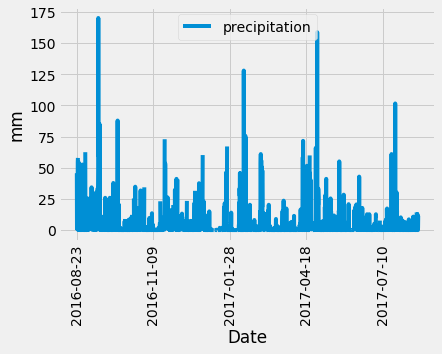

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results,columns=["Date","precipitation"])
df.set_index(df["Date"],inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.ylabel("mm")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mas = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mas_name = session.query(Station.name).filter(Station.station == "USC00519281").first()
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").first()
print(f"Lowest temperature: {temps[0]}")
print(f"Highest temperature: {temps[1]}")
print(f"Average temperature: {temps[2]}")

Lowest temperature: 12.2
Highest temperature: 29.4
Average temperature: 22.03582251082252


Text(0.5, 0, 'Temperature')

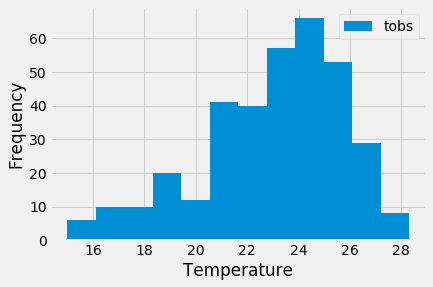

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= last_year).all()
df = pd.DataFrame(results,columns = ["tobs"])
df.plot.hist(bins=12)
plt.xlabel("Temperature")

# Close session

In [23]:
# Close Session
session.close()